# Regularization

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Overfitting and Underfitting

Overfitting and Underfitting are two **crucial concepts in machine learning** and are the prevalent **causes for the poor performance** of a machine learning model. 

<img src="./images/overfitting.png"/>

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from helpers.plt_overfit import overfit_example, output
plt.style.use('helpers/deeplearning.mplstyle')

Output()

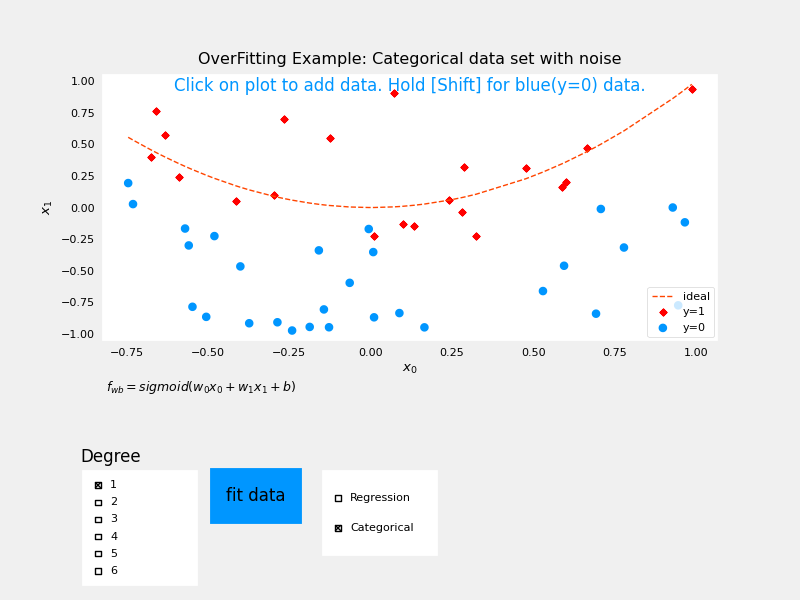

In [3]:
plt.close("all")
display(output)
ofit = overfit_example(False)

### What is Overfitting?

When a model performs very well for training data but has poor performance with test data (new data), it is known as overfitting.

Overfitting can happen due to low bias and high variance.

<img width="700" src="images/reg_01.png">

**Reasons for Overfitting**:
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model has a high variance
- The size of the training dataset used is not enough
- The model is too complex

**Ways to Tackle Overfitting:**
- Using K-fold cross-validation
- Using Regularization techniques such as Lasso and Ridge
- Training model with sufficient data
- Adopting ensembling techniques

## What is Underfitting?

<img width="700" src="images/reg_02.png">

hen a model has not learned the patterns in the training data well and is unable to generalize well on the new data

**Reasons for Underfitting:**
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model has a high bias
- The size of the training dataset used is not enough
- The model is too simple

**Ways to Tackle Underfitting:**
- Increase the number of features in the dataset
- Increase model complexity
- Reduce noise in the data
- Increase the duration of training the data

## Bias And Variance

### Errors in Machine Learning

<img width="400" src="images/reg_03.jfif">

### What is Bias?

Bias is the **difference between our actual and predicted values**. Bias is the simple assumptions that our model makes about our data to be able to predict new data.

<img width="300" src="images/reg_04.jfif">

High bias would cause an algorithm to miss relevant relations between the input features and the target outputs. This is sometimes referred to as underfitting.

### What is Variance?

We can define **variance as the model’s sensitivity to fluctuations in the data**. Our model may **learn from noise**. This will cause our model to **consider trivial features as important**. 

High variance would cause an algorithm to model the noise in the training set. This is most commonly referred to as overfitting.

## Bias-Variance Tradeoff

<img src="images/reg_07.webp">

- If our model is too simple and has very few parameters then it may have high bias and low variance.
- If our model has large number of parameters then it’s going to have high variance and low bias.

- `Underfitting` -> High bias
- `Overfitting` -> High variance
- `Good balance` -> Low bias, low variance

<img  src="images/reg_05.jfif">

- We can see that when bias is high, the error in both testing and training set is also high.
- If we have a high variance, the model performs well on the testing set, we can see that the error is low, but gives high error on the training set.
- We can see that there is a region in the middle, where the error in both training and testing set is low and the bias and variance is in perfect balance.

<img  src="images/reg_06.png">

To build a good model, we need to find a good balance between bias and variance such that it **minimizes the total error.**

    Total Error = Bias^2 + Variance + Irreducible errors

<img  src="images/reg_08.webp">

How to reduce the variance in a model?

- The easiest and most common way of **reducing the variance** in a ML model is by applying techniques that limit its effective capacity, i.e. **regularization**.
- The most common forms of regularization are:
    - **parameter norm penalties**, which limit the parameter updates during the training phase; 
    - **early stopping**, which cuts the training short; 
    - **pruning** for tree-based algorithms; 
    - **dropout** for neural networks, etc.

## Regularization

**Regularization** refers to **techniques that are used to calibrate machine learning models** in order to **minimize the adjusted loss function and prevent overfitting or underfitting**.

<img width="700" src="images/reg_09.jfif">

<img src="images/reg_11.png">

<img src="images/reg_10.jfif">

Output()

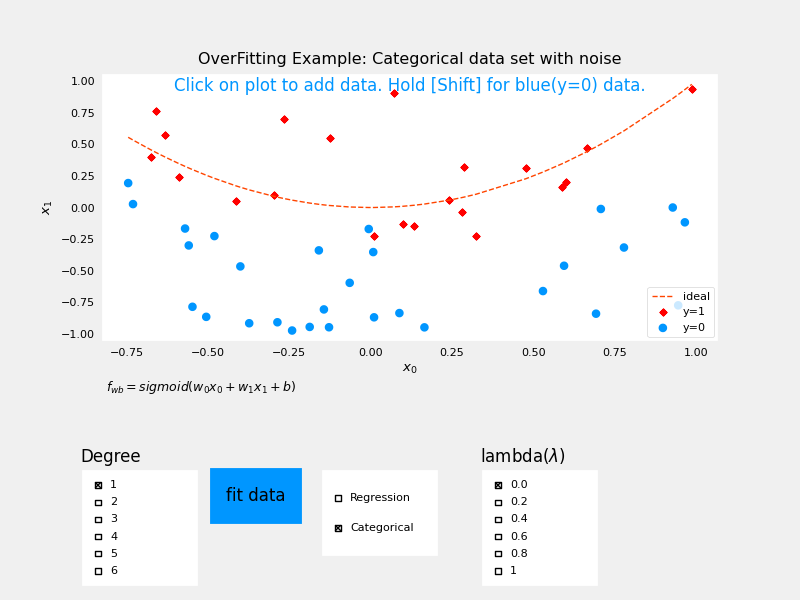

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from helpers.plt_overfit import overfit_example, output
plt.style.use('helpers/deeplearning.mplstyle')

plt.close("all")
display(output)
ofit = overfit_example(True)

### Ridge regression

Also known as Ridge Regularization, it modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

The higher the penalty, it reduces the magnitude of coefficients. It shrinks the parameters.

- **Regularization means explicitly restricting a model to avoid overfitting.** The particular kind used by ridge regression is known as **L2 regularization**.

In [13]:
%matplotlib inline
plt.style.use('default')

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from helpers.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print(f"Training set score: {ridge.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test_scaled, y_test):.2f}")

Training set score: 0.94
Test set score: 0.78


- The **optimum setting of alpha depends on the particular dataset we are using**.
- **Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization**.

In [15]:
traning_scores = {}
testing_scores = {}

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    traning_scores[alpha] = ridge.score(X_train_scaled, y_train)
    testing_scores[alpha] = ridge.score(X_test_scaled, y_test)

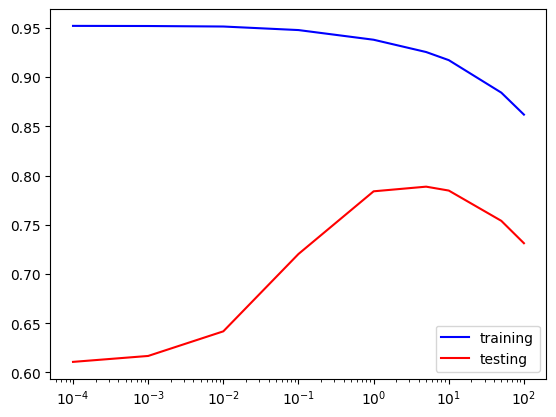

In [17]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

In [18]:
ridge10 = Ridge(alpha=0.001).fit(X_train_scaled, y_train)
print(f"Training set score: {ridge10.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test_scaled, y_test):.2f}")

Training set score: 0.95
Test set score: 0.62


In [19]:
ridge01 = Ridge(alpha=5).fit(X_train_scaled, y_train)
print(f"Training set score: {ridge01.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test_scaled, y_test):.2f}")

Training set score: 0.93
Test set score: 0.79


A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha.

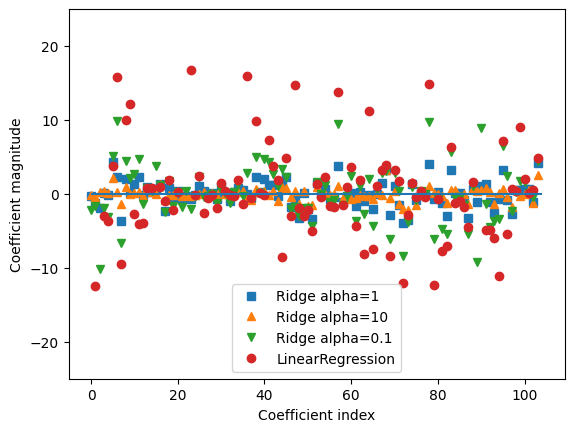

In [20]:
from sklearn.linear_model import LinearRegression

ridge = Ridge().fit(X_train_scaled, y_train)
ridge10 = Ridge(alpha=10).fit(X_train_scaled, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train_scaled, y_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

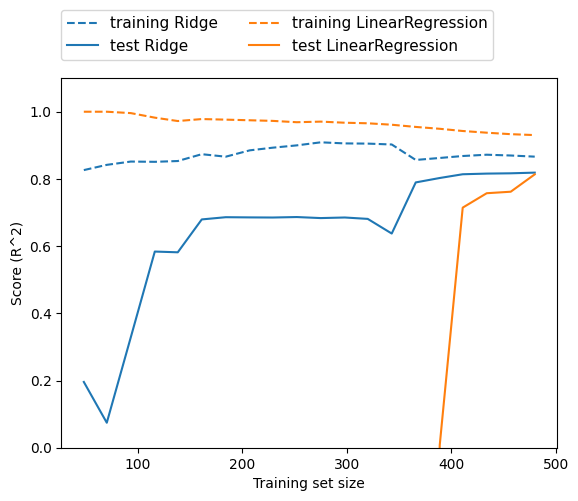

In [21]:
from helpers.plot_ridge_n_samples import plot_ridge_n_samples

plot_ridge_n_samples()
plt.show()

- **The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance**
- As one would expect, the **training score is higher than the test score for all dataset sizes**, for both ridge and linear regression.
- Because ridge is regularized, the **training score of ridge is lower than the training score for linear regression** across the board

### Lasso Regression

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.

- **The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero.**
    - This means some features are entirely ignored by the model. 
    - This can be seen as a form of **automatic feature selection**.
    - Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)

print(f"Training set score: {lasso.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.79
Test set score: 0.67
Number of features used: 6


In [25]:
traning_scores = {}
testing_scores = {}

alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train)
    traning_scores[alpha] = lasso.score(X_train_scaled, y_train)
    testing_scores[alpha] = lasso.score(X_test_scaled, y_test)

/home/administrator/python-machine-learning-public/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


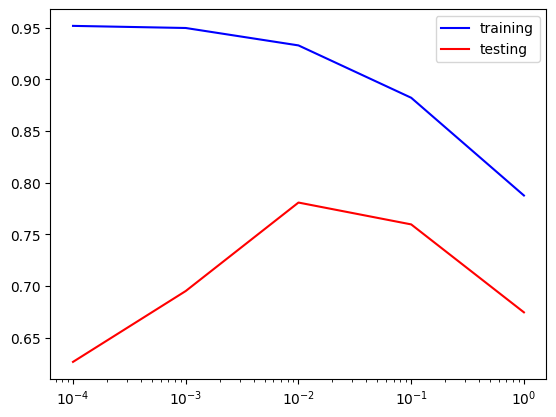

In [26]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

In [27]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.93
Test set score: 0.78
Number of features used: 61


In [28]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.63
Number of features used: 103


/home/administrator/python-machine-learning-public/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


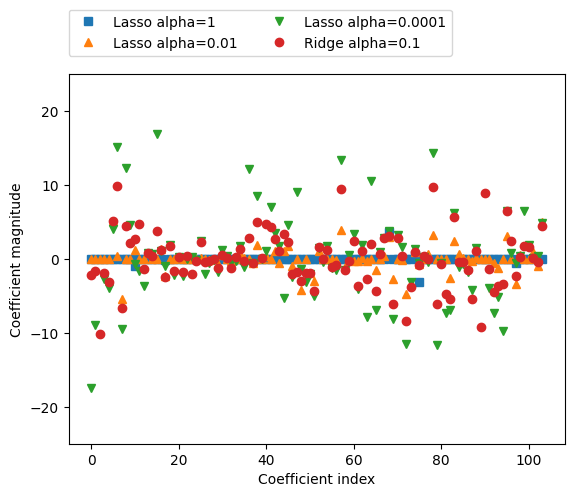

In [29]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In practice, ridge regression is usually the first choice between these two models.

However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

### Elastic Net Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [30]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000).fit(X_train_scaled, y_train)

print(f"Training set score: {e_net.score(X_train_scaled, y_train):.2f}")
print(f"Test set score: {e_net.score(X_test_scaled, y_test):.2f}")

Training set score: 0.93
Test set score: 0.79


## Strengths, weaknesses, and parameters

<img src="images/reg_12.png">

- **Ridge** is best for **datasets with many features**, the **lasso** is **good for feature selection**, and the elastic net is a combination of the two that may work well for datasets with many features and some correlated features. It is best to try multiple methods and compare their performance.

**Parameters**:
- The main parameter of linear models is the regularization parameter:
    - called `alpha` in the regression models
- Large values for alpha mean simple models. 
- In particular for the regression models, tuning these parameters is quite important. 
- Usually alpha is searched for on a logarithmic scale. 
- The other decision you have to make is whether you want to use **L1 regularization or L2 regularization**. 
    - If you assume that only a few of your features are actually important, you should use L1. 
    - Otherwise, you should default to L2.

**Strengths**:
- Linear models are **very fast** to train, and also fast to predict. 
- They **scale to very large datasets** and **work well with sparse data***. 
- Linear models often **perform well when the number of features is large compared to the number of samples**. 
- They are also often used on very large datasets, simply because it’s not feasible to train other models. 

**Weaknesses**:
- However, in lower-dimensional spaces, other models might yield better generalization performance.